In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
summer_data = pd.read_csv('summer.csv.zip')
summer_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [3]:
winter_data = pd.read_csv('winter.csv')
winter_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [4]:
merge_data =pd.merge(summer_data, winter_data) 
merge_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


In [5]:
summer_data.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [6]:
summer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [7]:
winter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

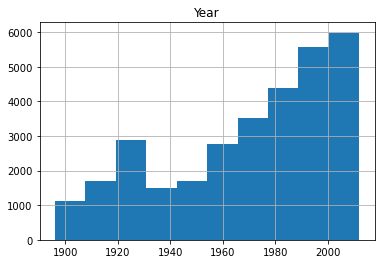

In [8]:
summer_data.hist()

In [9]:
summer_data['City'].value_counts()

London                   3567
Athens                   2149
Los Angeles              2074
Beijing                  2042
Sydney                   2015
Atlanta                  1859
Barcelona                1705
Seoul                    1546
Paris                    1396
Moscow                   1387
Montreal                 1305
Antwerp                  1298
Munich                   1185
Mexico                   1031
Tokyo                    1010
Helsinki                  889
Melbourne / Stockholm     885
Stockholm                 885
Rome                      882
Berlin                    875
Amsterdam                 710
St Louis                  470
Name: City, dtype: int64

In [10]:
pd.DataFrame(summer_data.groupby('City')['Medal'].value_counts())

Medal
City      Medal        
Amsterdam Bronze    242
          Silver    239
          Gold      229
Antwerp   Gold      497
          Silver    446
...                 ...
Sydney    Silver    667
          Gold      663
Tokyo     Bronze    343
          Silver    337
          Gold      330

[66 rows x 1 columns]

In [11]:
discipline = summer_data['Discipline'].unique()
len(discipline)

67

In [12]:
summer_data['Discipline']= summer_data['Discipline'].str.lower()

In [13]:
df_medal = pd.DataFrame(summer_data['City'].value_counts())
df_medal

,City
London,3567
Athens,2149
Los Angeles,2074
Beijing,2042
Sydney,2015
Atlanta,1859
Barcelona,1705
Seoul,1546
Paris,1396
Moscow,1387


In [14]:
df_medal = df_medal.rename(columns = {'city':'Code', 'City':'medal_count'})
df_medal['Code']= df_medal.index
df_medal.head(10)

,medal_count,Code
London,3567,London
Athens,2149,Athens
Los Angeles,2074,Los Angeles
Beijing,2042,Beijing
Sydney,2015,Sydney
Atlanta,1859,Atlanta
Barcelona,1705,Barcelona
Seoul,1546,Seoul
Paris,1396,Paris
Moscow,1387,Moscow


In [15]:
city =['London','Athens','Los Angeles','Beijing','Sydney','Atlanta','Barcelona','Seoul','Paris','Moscow']
medal =[3567,2149,2074,2042,2015,1859,1705,1546,1396,1387]

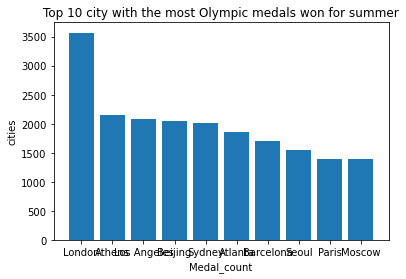

In [16]:


plt.bar(city, medal)
plt.xlabel('Medal_count')
plt.ylabel('cities')
plt.title('Top 10 city with the most Olympic medals won for summer')
plt.show()

In [20]:
df_medal_w = pd.DataFrame(winter_data['City'].value_counts())
df_medal_w

,City
Sochi,612
Turin,531
Vancouver,529
Salt Lake City,481
Nagano,447
Innsbruck,395
Lillehammer,343
Lake Placid,334
Albertville,325
Calgary,264


In [18]:
pd.DataFrame(winter_data.groupby('City')['Medal'].value_counts())

Medal
City                   Medal        
Albertville            Silver    110
                       Gold      108
                       Bronze    107
Calgary                Bronze     88
                       Gold       88
                       Silver     88
Chamonix               Bronze     41
                       Silver     39
                       Gold       38
Cortina d'Ampezzo      Gold       51
                       Bronze     50
                       Silver     49
Garmisch Partenkirchen Silver     37
                       Gold       36
                       Bronze     35
Grenoble               Silver     70
                       Gold       66
                       Bronze     63
Innsbruck              Silver    137
                       Gold      130
                       Bronze    128
Lake Placid            Silver    118
                       Bronze    111
                       Gold      105
Lillehammer            Silver    115
                       Bronze    114
                       Gold      114
Nagano                 Bronze    151
                       Gold      149
                       Silver    147
Oslo                   Bronze     47
                       Gold       45
                       Silver     44
Salt Lake City         Gold      163
                       Bronze    161
                       Silver    157
Sapporo                Gold       70
                       Bronze     66
                       Silver     64
Sarajevo               Bronze     74
                       Gold       74
                       Silver     74
Sochi                  Gold      206
                       Bronze    204
                       Silver    202
Squaw Valley           Gold       50
                       Bronze     49
                       Silver     48
St.Moritz              Bronze     77
                       Gold       76
                       Silver     76
Turin                  Silver    178
                       Bronze    177
                       Gold      176
Vancouver              Silver    177
                       Bronze    176
                       Gold      176

In [22]:
df_meda_w = df_medal_w.rename(columns = {'city':'Code', 'City':'medal_count'})
df_medal_w['Code']= df_medal_w.index
df_medal_w.head(10)

,City,Code
Sochi,612,Sochi
Turin,531,Turin
Vancouver,529,Vancouver
Salt Lake City,481,Salt Lake City
Nagano,447,Nagano
Innsbruck,395,Innsbruck
Lillehammer,343,Lillehammer
Lake Placid,334,Lake Placid
Albertville,325,Albertville
Calgary,264,Calgary


In [25]:
city_w = ['Sochi','Turin','Vancouver','Salt Lake City','Nagano','Innsbruck','Lillehammer','Lake Placid','Albertville','Calgary']
medal_w = [612, 531,529,481,447,395,343,334,325,264]

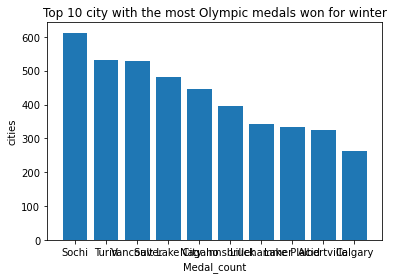

In [27]:

plt.bar(city_w, medal_w)
plt.xlabel('Medal_count')
plt.ylabel('cities')
plt.title('Top 10 city with the most Olympic medals won for winter')
plt.show()